# 🔬 Protein Engineering with ProteinMPNN: Sequence Generation + Evaluation

This notebook provides a full pipeline for **protein sequence optimization** using [Neurosnap](https://neurosnap.ai)’s API suite. Starting from a PDB structure, it leverages **ProteinMPNN** to generate optimized sequences under custom constraints—then evaluates them using state-of-the-art predictors for **stability**, **solubility**, and **structure**.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NeurosnapInc/neurosnap/blob/main/example_notebooks/protein_optimization.ipynb)

---

## 📝 Instructions

1. **Set up your environment**
   Ensure your Python environment includes the required packages listed below.

2. **Get your API Key**
   Create your key here: [neurosnap.ai/overview?view=api](https://neurosnap.ai/overview?view=api)

   > ⚠️ **Keep it safe:** Don’t share your API key.
   > Example:
   > `fd9f9be1974aa6f1609430c1e477926d4884188d5f752b5071457e10440b816773b92c0f1116442e54364734fd141537fcb6ce1619ad6825679f86511f38a80e`

3. **Upload a protein structure**
   Use a `.pdb` file as your starting point.

4. **Configure optimization settings**
   Set custom parameters like temperature, mutation mode, or positional constraints.

5. **Run the notebook**
   You’ll be prompted for:

   * Your API key
   * The uploaded structure

6. **Evaluate the sequences**
   Each generated sequence is scored by:

   * **TemStaPro** for thermostability
   * **NetSolP** for solubility
   * **Boltz-1** for structure prediction

7. **Review the results**
   Outputs are formatted for downstream use, with sequence names, ranks, and scores.

8. **Cleanup (Optional)**
   You may delete your API key after the run.

---

## ⚡ Why It’s Useful

* **Free to use** — no usage-based billing, credits on Neurosnap available separately
* **Saves time** — skip manual sequence formatting
* **Integrated tools** — unified predictions in one pipeline
* **Modular design** — extend with mutation rules, docking, or epitope tools

---

## 📦 Dependencies

Install using pip:

```bash
pip install git+https://github.com/NeurosnapInc/neurosnap.git ipywidgets tqdm pandas biopython
```

Or use `environment.yml`:

```yaml
dependencies:
  - neurosnap
  - ipywidgets
  - tqdm
  - pandas
  - biopython
```

---

## 👏 Credits

Written by Bhat Mohsin
Improved by Keaun Amani

In [ ]:
# @title 🔧 Install Dependencies
# @markdown Run this code cell to install all the dependencies for this notebook.

# @markdown **NOTE:** This cell only needs to be executed once.

!pip install git+https://github.com/NeurosnapInc/neurosnap.git ipywidgets tqdm pandas biopython

In [ ]:
# @title 🔧 Configure Notebook
# @markdown Set your inputs and preferences below, then run this cell.
# @markdown After running, upload the PDB file of the protein or enzyme you want to optimize.
# @markdown You can also adjust optional parameters — like the number of sequences, temperature, or amino acid biases — to fine-tune the sequence generation to your specific needs.
# @markdown ---

import json
import os

import pandas as pd
import requests
from google.colab import files
from IPython.display import display
from requests_toolbelt.multipart.encoder import MultipartEncoder

from neurosnap.api import NeurosnapAPI
from neurosnap.log import logger

### Settings and options
# @markdown ### Notebook Settings
API_KEY = ""  # @param {type:"string", placeholder:"Enter your neurosnap API key"}
api = NeurosnapAPI(api_key=API_KEY)

# @markdown ---
# @markdown ### Inverse Folding Settings
# Upload the file via UI
uploaded = files.upload()
original_filename = list(uploaded.keys())[0]
new_filename = "my_uploaded_file.pdb"
os.rename(original_filename, new_filename)
# create a collab forum fields variable
homo_oligomer = False  # @param {type:"boolean"}
invert_selection = False  # @param {type:"boolean"}
number_sequences = 100  # @param {type:"integer"}
sampling_temperature = 0.1  # @param {type:"number"}
model_type = "v_48_020"  # @param ["v_48_020", "v_48_010", "v_48_002"] {type:"string"}
model_version = "original"  # @param ["original", "multimer"] {type:"string"}
# @markdown #### Amino Acid Biases
# @markdown Set bias values between -5 and 5 for each amino acid
alanine_bias = 0  # @param {type:"integer"}
arginine_bias = 0  # @param {type:"integer"}
asparagine_bias = 0  # @param {type:"integer"}
aspartic_acid_bias = 0  # @param {type:"integer"}
cysteine_bias = 0  # @param {type:"integer"}
glutamine_bias = 0  # @param {type:"integer"}
glutamic_acid_bias = 0  # @param {type:"integer"}
glycine_bias = 0  # @param {type:"integer"}
histidine_bias = 0  # @param {type:"integer"}
isoleucine_bias = 0  # @param {type:"integer"}
leucine_bias = 0  # @param {type:"integer"}
lysine_bias = 0  # @param {type:"integer"}
methionine_bias = 0  # @param {type:"integer"}
phenylalanine_bias = 0  # @param {type:"integer"}
proline_bias = 0  # @param {type:"integer"}
serine_bias = 0  # @param {type:"integer"}
threonine_bias = 0  # @param {type:"integer"}
tryptophan_bias = 0  # @param {type:"integer"}
tyrosine_bias = 0  # @param {type:"integer"}
valine_bias = 0  # @param {type:"integer"}

# Use the renamed file path
file_path = new_filename
multipart_data = MultipartEncoder(
  fields={
    # The following fields are mandatory
    "Input Structure": json.dumps([{"type": "pdb", "name": "my_protein", "data": open(file_path).read()}]),
    # Optional fields
    "Number Sequences": str(number_sequences),
    "Sampling Temperature": str(sampling_temperature),
    "Model Type": model_type,
    "Model Version": model_version,
    "Alanine Bias": str(alanine_bias),
    "Arginine Bias": str(arginine_bias),
    "Asparagine Bias": str(asparagine_bias),
    "Aspartic acid Bias": str(aspartic_acid_bias),
    "Cysteine Bias": str(cysteine_bias),
    "Glutamine Bias": str(glutamine_bias),
    "Glutamic acid Bias": str(glutamic_acid_bias),
    "Glycine Bias": str(glycine_bias),
    "Histidine Bias": str(histidine_bias),
    "Isoleucine Bias": str(isoleucine_bias),
    "Leucine Bias": str(leucine_bias),
    "Lysine Bias": str(lysine_bias),
    "Methionine Bias": str(methionine_bias),
    "Phenylalanine Bias": str(phenylalanine_bias),
    "Proline Bias": str(proline_bias),
    "Serine Bias": str(serine_bias),
    "Threonine Bias": str(threonine_bias),
    "Tryptophan Bias": str(tryptophan_bias),
    "Tyrosine Bias": str(tyrosine_bias),
    "Valine Bias": str(valine_bias),
  }
)

r = requests.post(
  "https://neurosnap.ai/api/job/submit/ProteinMPNN?note=Protein Optimization Notebook | Initial inverse folding run",
  headers={
    "X-API-KEY": API_KEY,
    "Content-Type": multipart_data.content_type,
  },
  data=multipart_data,
)
mpnn_job_id = r.json()

In [ ]:
# @title 📥 Retrieve and Parse ProteinMPNN Output
# @markdown This cell fetches the output from your completed **ProteinMPNN job**, extracts the top-ranked sequences, and stores them with names like `prot1`, `prot2`, etc., where the number corresponds to the sequence’s rank.
# @markdown
# @markdown For example, `prot7` means the sequence ranked 7th in ProteinMPNN's output.
# @markdown
# @markdown You can control how many sequences to keep for downstream tools (e.g., **TemStaPro** or **NetSolP**) by adjusting the `N` parameter below.

# wait for job
status = api.wait_job_status(mpnn_job_id)
assert status == "completed", f"ProteinMPNN job with ID {mpnn_job_id} failed."

# download results file
api.get_job_file(mpnn_job_id, "out", "results.csv", "proteinmpnn_output.csv")

# Read the CSV data and create a dictionary
proteins = {}
N = 50  # @param {"type":"integer"}
# Open the file
with open("/content/proteinmpnn_output.csv", "r") as file:
  # Skip the header line
  next(file)

  # Process each line
  count = 0
  for line in file:
    # Stop after 50 sequences
    if count >= N:
      break

    # Split the line by comma
    parts = line.strip().split(",")

    # Extract rank and sequence
    rank = int(parts[0])
    sequence = parts[3]

    # Create protein name (prot1, prot2, etc.)
    prot_name = f"prot{rank}"

    # Add to dictionary with prot name as the key
    proteins[prot_name] = sequence

    # Increment counter
    count += 1

# Now proteins dictionary contains only the first N (50) sequences

In [ ]:
# @title 🔥 Submit Sequences to TemStaPro for Thermostability Prediction
# @markdown TemStaPro creates two outputs:
# @markdown
# @markdown mean_output.csv = average stability score
# @markdown output.csv = per residue stability values (can also be accessed via Neurosnap dashboard)

# Prepare the data for the API
multipart_data = MultipartEncoder(
  fields={
    # Pass all sequences to the API
    "Input Sequences": json.dumps({"aa": proteins, "dna": {}, "rna": {}}),
  }
)

# Make the API request
r = requests.post(
  "https://neurosnap.ai/api/job/submit/TemStaPro Protein Thermostability Prediction?note=Protein Optimization Notebook | Thermostability Calculation",
  headers={
    "X-API-KEY": API_KEY,
    "Content-Type": multipart_data.content_type,
  },
  data=multipart_data,
)

# wait for job
temstapro_job_id = r.json()
status = api.wait_job_status(temstapro_job_id)
assert status == "completed", f"TemStaPro job with ID {temstapro_job_id} failed."

# download results file
api.get_job_file(temstapro_job_id, "out", "mean_output.csv", "Tempstat_output.csv")

Job submitted. Job ID: 68015ec6c6824c31c69b9cd4


In [ ]:
# @title 💧 Submit Sequences to NetSolP for Solubility Prediction
# @markdown This cell sends your ranked ProteinMPNN sequences to **NetSolP** to predict their solubility.
# @markdown
# @markdown Results will be saved to a file named `NetSolp_output.csv` in your working directory.

multipart_data = MultipartEncoder(
  fields={
    # The following fields are mandatory
    "Input Sequences": json.dumps({"aa": proteins, "dna": {}, "rna": {}}),
  }
)

r = requests.post(
  "https://neurosnap.ai/api/job/submit/NetSolP-1.0?note=Protein Optimization Notebook | Solubility prediction",
  headers={
    "X-API-KEY": API_KEY,
    "Content-Type": multipart_data.content_type,
  },
  data=multipart_data,
)

# wait for jobI
netsolp_job_id = r.json()
status = api.wait_job_status(netsolp_job_id)
assert status == "completed", f"TemStaPro job with ID {netsolp_job_id} failed."

# download results file
api.get_job_file(netsolp_job_id, "out", "netsol_predictions.csv", "NetSolp_output.csv")

In [ ]:
# @title 💧 View Top Soluble Sequences (Sorted by NetSolP Score)
# @markdown This cell reads the NetSolP output and displays the top protein sequences ranked by **mean solubility**, from highest to lowest.
# @markdown
# @markdown By default, it shows the top **10** sequences. You can change this by modifying the `n` parameter below.
# @markdown
# @markdown The sequences retain their original IDs (e.g., `prot1`, `prot2`) from the ProteinMPNN output to help track them across tools.


def get_top_soluble_proteins(csv_file, n):
  """
  Reads a CSV file of protein data and returns the top N proteins with highest mean solubility.

  Args:
      csv_file (str): Path to the CSV file containing protein data
      n (int): Number of top proteins to return

  Returns:
      DataFrame: Top N proteins sorted by mean solubility in descending order
  """
  # Read the CSV file
  df = pd.read_csv(csv_file)

  # Sort the dataframe by Mean Solubility in descending order
  sorted_df = df.sort_values(by="Mean Solubility", ascending=False)

  # Select only the columns we want to display
  result_df = sorted_df[["ID", "Sequence", "Mean Solubility"]].head(n)

  return result_df


# Set your file path and number of proteins here
csv_file = "/content/NetSolp_output.csv"
n = 10  # @param {"type":"integer"}

# Get the top soluble proteins
top_proteins = get_top_soluble_proteins(csv_file, n)

# Reset the index to avoid displaying it
top_proteins = top_proteins.reset_index(drop=True)

# Configure pandas display options for better visualization
pd.set_option("display.max_colwidth", 50)  # Truncate long sequences for better display
pd.set_option("display.precision", 4)  # Set precision for float values

# Print header
print(f"Top {n} proteins with highest mean solubility:")

# Fix the formatting issues with styling compatible with older pandas versions
styled_table = (
  top_proteins.style.set_properties(
    **{"text-align": "center", "white-space": "pre-wrap", "font-size": "11pt", "border": "1px solid #3d3d3d", "padding": "8px"}
  )
  .set_table_styles(
    [
      {
        "selector": "th",
        "props": [
          ("text-align", "center"),
          ("font-weight", "bold"),
          ("background-color", "black"),
          ("border", "1px solid #CCCCCC"),
          ("padding", "8px"),
        ],
      },
      {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14pt"), ("padding", "10px")]},
      {"selector": "", "props": [("border-collapse", "collapse")]},
      # Hide index using CSS instead of hide_index() method
      {"selector": ".row_heading, .blank", "props": [("display", "none")]},
    ]
  )
  .format({"Mean Solubility": "{:.4f}"})
)

# Display the styled table
display(styled_table)

# Optional: Format sequence display with truncation
# For older pandas versions, we might need to do this before styling
top_proteins["Sequence"] = top_proteins["Sequence"].apply(lambda x: x[:40] + "..." if len(x) > 40 else x)
print("\nWith truncated sequences:")
display(top_proteins)

# Optional: Save the results to a CSV file
# top_proteins.to_csv("top_soluble_proteins.csv", index=False)

Top 10 proteins with highest mean solubility:


,ID,Sequence,Mean Solubility
0,prot7,ALTLTESGGGTVAAGGSTTLTCTASSPAFTSSTATWAWYAQKAGGATVLVASITGSNGTTTYDAKWAAGSTISVNTSNSTATLTLNNLTTADTATYYCVPLPSGSADQSKLENYKYWGQGTKLTVTA,0.7281
1,prot1,AVTLTESGGGTVAAGGSTTLTCTASTPAFNSSSATWSWWAQKAGGERELVASITGASGTTTYSAKWATGSTISVDTSNSTSTLTLNNLTTADSATYYCVPLASGTADPDKLEDYKYWGQGTQLTVTA,0.7171
2,prot28,PVTITESGGGTVAAGGSVTLTCTASKPVFNSSSATWSWVRQTPGGPPVLAASITGSNGATTYDPAFAAGSTISVDTSNSTATLTLNNLTPADTATYYCVPLSSGSADPNKLDSWKYWGQGTQLTVTA,0.7061
3,prot6,EVTLTESGGGTVAAGGSVTLTCTASQPVFNGSTATWSWVAQKAGGPPVLAASITGADGTTKYDPAVAAGSTISRNASNSTITLKLSGLTTADSATYYCVPLESGEADPNKLSEWKYWGQGTQLTVTA,0.7003
4,prot26,AVVLTESGGGTVAEGGSVTLTCTASVPAFNGATDTWAWWAQKAGGPPVLAASITGADGTTTYHPDWAAGSTISRDASNSTATLTLNGLTPADTATYYCVPLASGSADAAKPDQWQYWGQGTQLTVTA,0.6821
5,prot14,ALTLTESGGGTVAEGGSTTLTCTASSPAFNGSTATWAWVAQKPGGPPVLAASITGADGTTTYDPAYASGSSISRNASNSTSTLTLNGLTTADSATYYCVPLPSGTADPSQPQNWQYWGQGTQLTVTA,0.6711
6,prot3,AVTLTESGGGTVAEGGSTTLTCTASVPAFNGSSDTWAWWAQKAGGPPVLVASITGSSGTTTYDSKWASGSTISRDTSNSTATLTLNNLTVSDTATYYCVPLSSGSADPSKLSEAKYWGQGTQLTVTA,0.6675
7,prot50,TVTLTESGGGTVAAGGSTTLTCTASKSVFTGSTATWSWWAQKPGGERVLVSSITGSNGSTSYHPAYAAGSTISVDRSNGTATLTLNNLTVADSATYYCVPLPSGSADPDKQEEWKYWGQGTQLTVTA,0.6631
8,prot8,ALTLTESGGGTVAAGGSTTLTCTASSSAFTGSSATWAWVAQKAGGPPVLVASIEGSDGTVTYHPKWAAGSTISVDRSNSTSTLTLNNLTTADTATYYCVPLPSGSADPNQPDKWLHWGQGTQLTVTA,0.6570
9,prot4,PVVLTESGGGTVAAGGSVTLTCTASSPVFNSSSATWAWWAQKAGGPPVLVASIEGSSGTTTYDAAFAAGSTISVNRSNSTITLTLSGLTTADTATYYCVPLPSGSADPSKQEQAKYWGQGTQLTVTA,0.6545



With truncated sequences:


,ID,Sequence,Mean Solubility
0,prot7,ALTLTESGGGTVAAGGSTTLTCTASSPAFTSSTATWAWYA...,0.7281
1,prot1,AVTLTESGGGTVAAGGSTTLTCTASTPAFNSSSATWSWWA...,0.7171
2,prot28,PVTITESGGGTVAAGGSVTLTCTASKPVFNSSSATWSWVR...,0.7061
3,prot6,EVTLTESGGGTVAAGGSVTLTCTASQPVFNGSTATWSWVA...,0.7003
4,prot26,AVVLTESGGGTVAEGGSVTLTCTASVPAFNGATDTWAWWA...,0.6821
5,prot14,ALTLTESGGGTVAEGGSTTLTCTASSPAFNGSTATWAWVA...,0.6711
6,prot3,AVTLTESGGGTVAEGGSTTLTCTASVPAFNGSSDTWAWWA...,0.6675
7,prot50,TVTLTESGGGTVAAGGSTTLTCTASKSVFTGSTATWSWWA...,0.6631
8,prot8,ALTLTESGGGTVAAGGSTTLTCTASSSAFTGSSATWAWVA...,0.6570
9,prot4,PVVLTESGGGTVAAGGSVTLTCTASSPVFNSSSATWAWWA...,0.6545


In [ ]:
# @title 🔥 Rank Sequences by Thermostability at a Specific Temperature
# @markdown This cell ranks the generated protein sequences based on their **raw thermal stability scores** at a chosen temperature (e.g., 40°C, 45°C, 50°C, 55°C, 60°C, or 65°C).
# @markdown
# @markdown ✅ **Defaults:**
# @markdown - Temperature: **60°C**
# @markdown - Top N sequences shown: **10** (`N_TOP_PROTEINS = 10`)
# @markdown
# @markdown 📌 You can change the `TEMPERATURE` value to target a different condition — for example:
# @markdown ```python
# @markdown TEMPERATURE = 55
# @markdown ```
# @markdown
# @markdown The output includes the `protein_id`, full `sequence`, and the raw value at the selected temperature.

# Configuration
CSV_FILE = "/content/Tempstat_output.csv"
N_TOP_PROTEINS = 10  # @param {"type":"integer"}
TEMPERATURE = 50  # @param {"type":"integer"}

# Read the entire CSV file into a DataFrame
thermostability_data = pd.read_csv(CSV_FILE)

# Determine the column name for the specified temperature
temp_column = f"t{TEMPERATURE}_raw"

# Find matching columns (with more flexible matching)
matching_columns = [col for col in thermostability_data.columns if temp_column.lower() in col.lower()]
if not matching_columns:
  raise ValueError(f"Temperature {TEMPERATURE} is not valid. Choose from 40, 45, 50, 55, 60, or 65.")

# Use the first matching column
column_to_use = matching_columns[0]
print(f"Using column: {column_to_use}")

# Sort and select the top proteins
top_proteins = (
  thermostability_data.sort_values(by=column_to_use, ascending=False)[["protein_id", "sequence", column_to_use]]
  .head(N_TOP_PROTEINS)
  .rename(columns={column_to_use: f"Raw Value (T={TEMPERATURE})"})
)

# Configure pandas display options
pd.set_option("display.max_colwidth", None)  # Show full sequences
pd.set_option("display.precision", 4)  # Set precision for float values

# Display results
print(f"\nTop {N_TOP_PROTEINS} proteins with highest raw values at temperature {TEMPERATURE}°C:\n")
display(top_proteins)

Using column: t50_raw

Top 10 proteins with highest raw values at temperature 50°C:



,protein_id,sequence,Raw Value (T=50)
39,prot45,ALTLTESGGGTVPQGGSVTLTCTASTPAFNGSTATWAWVAQYPGGPPVLVASITGSSGTTTYHPKWAPGSKISRNPSNSTSTLTLNNLTPEDSATYYCVPLPSGSADPNKPSEWKYWGQGTQLTVLP,0.6845
29,prot36,SVTITESGGGTVAEGGSVTLTCTASSPTFTGSSDTWAWVAQYPGGPPVLVASITGSDGTTTYHPQWAPGSTISRDASNGTATLTLNNLTVADSATYYCVPLSSGEANQNEPSKWKHWGQGTQLTVTA,0.3772
48,prot8,TVTITESGGGTVAAGGSVTLTCTASVPAFNGSSDTWAWVAQKPGGPPVLVASITGSSGTTTYDPAWAAGSTISVDRSNSTSTLTLNGLTPADSATYYCVPLTSGEFDPNKLEEAKYWGQGTQLTVVA,0.3312
36,prot42,AVTLTESGGGTVSAGGSLTLTCTSSTPAFNSSTATWSWWAQKPGGPRILVASITGSNGTTTYHPKWAPGSTISVDRSNSTSTLTLNNLTPEDSATYYCVPLSSGEADPNKEENWKYWGQGTQVTVLP,0.3193
26,prot33,TLTITESGGGTVAAGGSTTLTCTASTPAFNSSTATWAWVAQYPGGPPILVASITGSNGTTTYHPKFAAGSSISVNRSNSTSTLTLNNLRPEDSATYYCVPLPSGEFDQDKQDQWLYWGQGTQLTVVA,0.2684
35,prot41,AVTLTESGGGTVAEGGSTTLTCTASSPVFNGSSDTWAWLAQKPGGPPVLVASITGSSGTTTYHPKWAPGSTISVDRSNSTATLTLNNLKVEDTATYYCVPLSSGSFDQNQLDKLQYWGQGTQLTVTA,0.2647
37,prot43,PVVLTESGGGTVAAGGSLTLTCTANSPAFNGSSATWSWLAQYPGGPPVLVASITGSDGTVTYHPKFAAGSTISVDRSNSTATLTLNNLTPADSATYYCVPLPSGSADPNQLDKYLHWGQGTQVTVLA,0.2350
28,prot35,PVVLTESGGGTVAAGGSTTLTCVASRPVFNGSDATWAWWAKKPGGPEVLVASIEGSSGTTTYHPAWAAGSTISVDRSNSTATLTLNNLTPADTATYYCVPLPSGSADPNKPEQWLYRGQGTQLTVTA,0.2325
46,prot6,EVVLTESGGGTVAAGGSTTLTCTASVPAFTSSTATWAWLAQYPGGPPVLVASITGSNGTTTYHPKWAAGSTISVDRSNSTATLTLNNLTVADSATYYCAPLPSGSFDQSKLENIKYWGQGTQLTVTA,0.1998
12,prot20,TVVLTESGGGTVAEGGSTTLTCTANVPAFNGSSATWAWLAQKPGGPPVLVASIEGSSGTTTYHPKWAAGSTISVNSSNSTSTLTLNNLTVEDSATYYCAPLSSGSFDPSKLSELKYWGQGTQLTVTA,0.1896


Want sequences that are both highly soluble and thermally stable? This cell adds their solubility and stability scores together and ranks them by the combined value.

📌 You can adjust:

temp → temperature for thermal stability analysis

TOP_N → number of top sequences to display

This is especially useful when you want balanced candidates for real-world applications.



Solubility data columns: ['ID', 'Sequence', 'Mean Solubility', 'Mean Usability', 'Solubility Model 0', 'Solubility Model 1', 'Solubility Model 2', 'Solubility Model 3', 'Solubility Model 4', 'Usability Model 0', 'Usability Model 1', 'Usability Model 2', 'Usability Model 3', 'Usability Model 4']
Thermostability data columns: ['protein_id', 'position', 'sequence', 'length', 't40_binary', 't40_raw', 't45_binary', 't45_raw', 't50_binary', 't50_raw', 't55_binary', 't55_raw', 't60_binary', 't60_raw', 't65_binary', 't65_raw', 'left_hand_label', 'right_hand_label', 'clash']
Using temperature column: t50_raw

Top 20 proteins with highest combined solubility and thermostability at 50°C:



,protein_id,Mean Solubility,t50_raw,combined_value
37,prot43,0.6140,0.4107,1.0247
26,prot33,0.6383,0.2719,0.9102
23,prot30,0.6293,0.2792,0.9085
20,prot28,0.7061,0.1780,0.8841
47,prot7,0.7281,0.1546,0.8827
8,prot17,0.6384,0.2342,0.8726
35,prot41,0.6038,0.2530,0.8568
21,prot29,0.6191,0.2294,0.8485
4,prot13,0.6203,0.2258,0.8461
17,prot25,0.5939,0.2464,0.8403


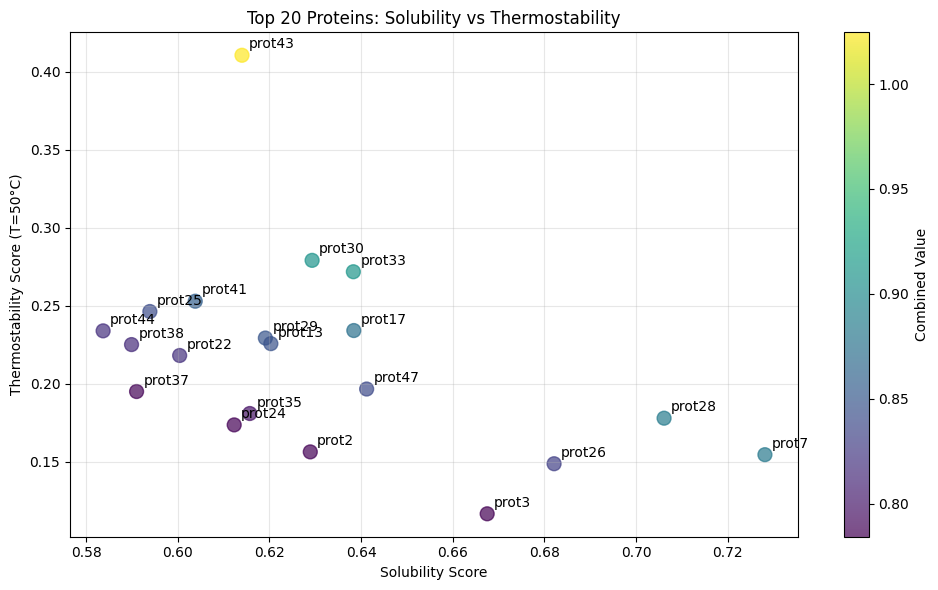

In [ ]:
# Configuration parameters
SOLUBILITY_FILE = "/content/NetSolp_output.csv"
THERMOSTABILITY_FILE = "/content/Tempstat_output.csv"
TEMPERATURE = 50# @param {"type":"integer"}
TOP_N = 20 # @param {"type":"integer"}

# Load both datasets into DataFrames
solubility_data = pd.read_csv(SOLUBILITY_FILE)
thermostability_data = pd.read_csv(THERMOSTABILITY_FILE)

# Display column names for debugging and inspection
print("Solubility data columns:", solubility_data.columns.tolist())
print("Thermostability data columns:", thermostability_data.columns.tolist())

# Determine temperature column
temp_col = f't{TEMPERATURE}_raw'
if temp_col not in thermostability_data.columns:
    # Try more flexible matching
    matching_cols = [col for col in thermostability_data.columns if temp_col.lower() in col.lower()]
    if matching_cols:
        temp_col = matching_cols[0]
    else:
        raise ValueError(f"Temperature column for {TEMPERATURE}°C not found in thermostability file")

print(f"Using temperature column: {temp_col}")

# Select and prepare relevant columns
sol_subset = solubility_data.rename(columns={'ID': 'protein_id'})[['protein_id', 'Mean Solubility']]
thermo_subset = thermostability_data[['protein_id', temp_col]]

# Merge the two dataframes
merged_data = pd.merge(sol_subset, thermo_subset, on='protein_id', how='inner')

# Calculate combined value
merged_data['combined_value'] = merged_data['Mean Solubility'] + merged_data[temp_col]

# Get top proteins
top_proteins = (
    merged_data
    .sort_values(by='combined_value', ascending=False)
    .head(TOP_N)
)

# Display the results
print(f"\nTop {TOP_N} proteins with highest combined solubility and thermostability at {TEMPERATURE}°C:\n")
display(top_proteins)

# Optional: Add a visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(top_proteins['Mean Solubility'], top_proteins[temp_col],
            s=100, alpha=0.7, c=top_proteins['combined_value'], cmap='viridis')

for i, row in top_proteins.iterrows():
    plt.annotate(row['protein_id'],
                 (row['Mean Solubility'], row[temp_col]),
                 xytext=(5, 5), textcoords='offset points')

plt.colorbar(label='Combined Value')
plt.xlabel('Solubility Score')
plt.ylabel(f'Thermostability Score (T={TEMPERATURE}°C)')
plt.title(f'Top {TOP_N} Proteins: Solubility vs Thermostability')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

After evaluating all results, use this cell to predict the 3D structure of a sequence you like.
It will ask you to enter the name (ID) of the sequence (e.g., prot1, prot2, etc.).

A great way to visualize how your optimized enzyme might fold!

In [ ]:
def extract_protein_sequence(csv_file, protein_id):
    """
    Extract protein sequence from CSV file for a given protein ID.

    Args:
        csv_file: Path to the CSV file containing protein sequences
        protein_id: ID of the protein to search for

    Returns:
        Protein sequence as string, or None if protein not found
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file)

        # Find the row with the matching protein_id
        protein_row = df[df['protein_id'] == protein_id]

        # Check if protein was found
        if protein_row.empty:
            return None

        # Extract the sequence
        sequence = protein_row['sequence'].values[0]

        return sequence

    except Exception as e:
        print(f"Error: {e}")
        return None

# File path
csv_file = "/content/Tempstat_output.csv"

# Protein ID to search for
protein_id = '' # @param {type:"string", placeholder:"enter a the protein name e,g prot37"}


# Extract sequence
protein_sequence = extract_protein_sequence(csv_file, protein_id)

#using boltz-1 to generate the structure of sequence
multipart_data = MultipartEncoder(
  fields={
    # The following fields are optional
    "Input Sequences": json.dumps({"aa": {protein_id : protein_sequence}}),
    #"Input Molecules": json.dumps([{"data": open("receptor.sdf").read(),"type": "sdf"}, {"data": "C=C=C", "type": "smiles"}]),
    #"Residue Modifications": "Protein_1:102:MLY",
    #"Binder Sequence": "Protein_1",
    #"Pocket Restraints": "Protein_2:66",
    #"Covalent Restraints": "Protein_1:6:CA:Protein_2:26:CB",
    #"MSA Mode": "mmseqs2_uniref_env",
    #"Number Recycles": "6",
    #"Sampling Steps": "200",
    #"Diffusion Samples": "5",
    #"Step Scale": "1.638",
  }
)

r = requests.post(
  "https://neurosnap.ai/api/job/submit/Boltz-1 (AlphaFold3)?note=Protein Optimization Notebook | Re-folding of structures",
  headers={
    "X-API-KEY": API_KEY,
    "Content-Type": multipart_data.content_type,
  },
  data=multipart_data,
)
boltz1_job_id = r.json()
print("Job submitted. Job ID:", boltz1_job_id)

enter the name of the protein you want to create structure of like prot1 or prot7. prot37


You can check the structure of the finalised sequence by going to neurosnap dashboard [click here](https://neurosnap.ai/overview)